In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from glob import glob
import pathlib
import common

FONT_SIZE = 15
plt.rc('font', size=FONT_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=FONT_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=FONT_SIZE)    # legend fontsize
plt.rc('figure', titlesize=FONT_SIZE)  # fontsize of the figure title
matplotlib.rc('lines', linewidth=3)

In [4]:
trace = 'w200m.tr'

df = common.load_reports(common.log_dir)
filter_idx = (
    (df.trace_file == trace) 
    & (df.uni_size == 1)
    & ((df.cache_type != "LFO") | (df.sample_size == 1000000))
    & (df.n_warmup == 20000000)
    & ((df.cache_type != "LR") | (df.version == "mat"))
)

df1 = df[filter_idx].copy()

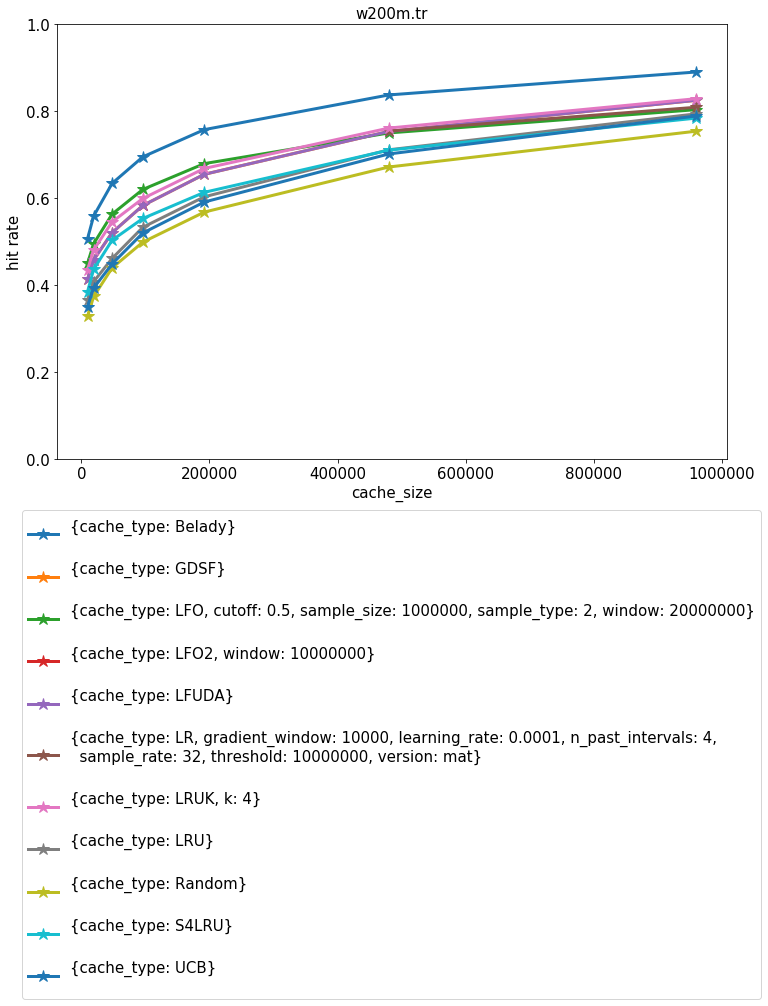

In [5]:
top = df1[['label', 'cache_size', 'byte_hit_rate']].groupby(['label']).agg({'byte_hit_rate': 'mean'}).sort_values(by='byte_hit_rate', ascending=False)[0:5].index.tolist()
df_show = df1[df1.label.isin(top)]
df_show = df1

fig, ax = plt.subplots(figsize=(12, 8))
for k, grp in df_show.groupby(['label']):
    grp = grp.sort_values(by=['cache_size'])
    ax = grp.plot(ax=ax, kind='line', x='cache_size', y='byte_hit_rate', label=k, marker='*', markersize=12)
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1))
plt.ylabel('hit rate')
plt.title(trace)
plt.ylim([0, 1.])
plt.show()

In [6]:
df1.pivot(index='cache_type', columns='cache_size', values='byte_hit_rate')

cache_size,9600,19200,48000,96000,192000,480000,960000
cache_type,,,,,,,
Belady,0.507238,0.559491,0.634563,0.695575,0.758187,0.837926,0.890709
GDSF,0.413774,0.458722,0.521308,0.583731,0.655460,0.754018,0.825571
LFO,0.450408,0.495917,0.563851,0.620665,0.680048,0.750547,0.804093
LFO2,NaN,NaN,NaN,0.585859,NaN,NaN,NaN
LFUDA,0.413774,0.458722,0.521308,0.583731,0.655460,0.754018,0.825571
LR,NaN,NaN,NaN,NaN,NaN,0.754748,0.809624
LRU,0.366307,0.408642,0.461979,0.533608,0.603711,0.711789,0.794448
LRUK,0.435752,0.481427,0.546003,0.599830,0.668941,0.761714,0.829320
Random,0.328672,0.374453,0.440062,0.499504,0.568570,0.672224,0.754603


In [172]:
trace = 'w200m.tr'

df = load_reports(log_dir)
filter_idx = (
    (df.trace_file == trace) 
    & (df.uni_size == 1)
    & (df.n_warmup == 20000000)
    & (df.cache_size == 48000)
    & (df.cache_type == "LR")
    & (df.version == "static")
    #& (~ pd.isna(df.segment_byte_hit_rate))
)

df1 = df[filter_idx].copy()
df1['label'] = df1.apply(lambda x: to_label(x), axis='columns')

In [173]:
df1.pivot(index='gradient_window', columns='learning_rate', values='byte_hit_rate').round(3)

learning_rate,1e-06,1e-05,2e-05,5e-05,0.0001,0.0002,0.0005,0.001,0.002,0.005,0.01,0.02,0.05,0.1
gradient_window,,,,,,,,,,,,,,
1.0,0.554,0.555,0.555,0.554,0.552,0.549,0.440,0.440,0.440,0.440,0.440,0.440,0.440,0.440
2.0,0.555,0.556,0.556,0.556,0.555,0.553,0.367,0.440,0.440,0.440,0.440,0.440,0.440,0.440
5.0,0.556,0.557,0.557,0.532,0.473,0.429,0.355,0.326,0.440,0.440,0.440,0.440,0.440,0.440
10.0,0.556,0.557,0.461,0.412,0.375,0.353,0.335,0.331,0.329,0.438,0.440,0.440,0.440,0.440
20.0,0.556,0.557,0.444,0.446,0.398,0.340,0.333,0.329,0.327,0.328,0.344,0.440,0.440,0.440
50.0,0.556,0.557,0.557,0.444,0.442,0.416,0.338,0.333,0.328,0.326,0.327,0.324,0.433,0.440
100.0,0.556,0.557,0.557,0.557,0.444,0.438,0.396,0.337,0.333,0.329,0.326,0.326,0.330,0.436
200.0,0.556,0.556,0.557,0.557,0.557,0.443,0.439,0.393,0.341,0.331,0.323,0.325,0.326,0.369
500.0,0.554,0.556,0.556,0.557,0.557,0.557,0.441,0.440,0.411,0.339,0.333,0.326,0.324,0.323


In [165]:
df1.pivot(index='gradient_window', columns='learning_rate', values='byte_hit_rate').round(3)

learning_rate,1e-06,1e-05,2e-05,5e-05,0.0001,0.0002,0.0005,0.001,0.002,0.005,0.01,0.02,0.05,0.1
gradient_window,,,,,,,,,,,,,,
1.0,0.551,0.469,0.435,0.389,0.348,NaN,0.440,0.440,0.440,0.440,0.440,0.440,0.440,0.440
2.0,0.557,0.464,0.433,0.401,0.369,0.312,0.435,0.440,0.440,0.440,0.440,0.440,0.440,0.440
5.0,0.557,0.435,0.421,0.410,0.380,0.360,0.344,0.411,0.440,0.440,0.440,0.440,0.440,0.440
10.0,0.557,0.459,0.440,0.437,0.411,0.392,0.367,0.344,0.346,0.440,0.440,0.440,0.440,0.440
20.0,0.558,0.558,0.482,0.431,0.399,0.383,0.350,0.349,0.360,0.362,0.432,0.440,0.440,0.440
50.0,0.557,0.558,0.558,0.558,0.427,0.403,0.355,0.346,0.339,0.366,0.363,0.393,0.440,0.440
100.0,0.556,0.558,0.558,0.558,0.557,0.426,0.367,0.352,0.345,0.361,0.366,0.362,0.418,0.440
200.0,0.556,0.558,0.558,0.558,0.558,0.557,0.415,0.368,0.351,0.341,0.363,0.366,0.355,0.427
500.0,0.554,0.557,0.558,0.558,0.558,0.558,0.464,0.421,0.391,0.349,0.344,0.360,0.365,0.360


In [193]:
trace = 'w200m.tr'

df = load_reports(log_dir)
filter_idx = (
    (df.trace_file == trace) 
    & (df.uni_size == 1)
    & (df.n_warmup == 20000000)
    & (df.cache_size == 96000)
    & (df.cache_type == "LR")
    & (df.version == "balance")
    #& (~ pd.isna(df.segment_byte_hit_rate))
)

df1 = df[filter_idx].copy()
df1['label'] = df1.apply(lambda x: to_label(x), axis='columns')

In [194]:
df1.pivot(index='gradient_window', columns='learning_rate', values='byte_hit_rate').round(3)

learning_rate,1e-06,1e-05,2e-05,5e-05,0.0001,0.0002,0.0005,0.001,0.002,0.005,0.01
gradient_window,,,,,,,,,,,
1.0,0.610,0.611,0.611,0.488,0.441,0.496,0.500,0.500,0.499,0.500,0.499
2.0,0.612,0.612,0.612,0.553,0.409,0.490,0.499,0.500,0.500,0.499,0.499
5.0,0.614,0.584,0.571,0.571,0.445,0.419,0.493,0.500,0.500,0.500,0.499
10.0,0.614,0.611,0.587,0.415,0.391,0.379,0.417,0.472,0.499,0.500,0.500
20.0,0.613,0.571,0.532,0.430,0.408,0.408,0.403,0.397,0.416,0.483,0.499
50.0,0.613,0.514,0.533,0.488,0.417,0.426,0.411,0.405,0.388,0.409,0.425
100.0,0.615,0.530,0.496,0.482,0.484,0.413,0.416,0.411,0.407,0.392,0.408
200.0,0.616,0.603,0.527,0.500,0.476,0.472,0.410,0.420,0.409,0.407,0.393
500.0,0.615,0.612,0.554,0.525,0.487,0.477,0.463,0.413,0.419,0.413,0.401


In [ ]:
df1.pivot(index='gradient_window', columns='learning_rate', values='byte_hit_rate').round(3)

learning_rate,1e-06,1e-05,2e-05,5e-05,0.0001,0.0002,0.0005,0.001,0.002,0.005,0.01,0.02,0.05,0.1
gradient_window,,,,,,,,,,,,,,
1.0,0.613,0.614,0.614,0.612,0.611,0.588,0.500,0.500,0.499,0.500,0.500,0.500,0.500,0.500
2.0,0.615,0.616,0.616,0.616,0.614,0.610,0.489,0.499,0.500,0.500,0.500,0.500,0.500,0.500
5.0,0.617,0.617,0.617,0.577,0.511,0.494,0.400,0.429,0.500,0.500,0.500,0.500,0.500,0.500
10.0,0.617,0.574,0.486,0.423,0.402,0.400,0.400,0.390,0.392,0.499,0.500,0.500,0.500,0.500
20.0,0.617,0.617,0.501,0.466,0.427,0.378,0.391,0.397,0.388,0.389,0.452,0.500,0.500,0.500
50.0,0.616,0.617,0.617,0.494,0.468,0.444,0.387,0.391,0.391,0.388,0.389,0.390,0.498,0.500
100.0,0.617,0.617,0.617,0.617,0.492,0.467,0.429,0.391,0.388,0.395,0.389,0.388,0.429,0.500
200.0,0.616,0.616,0.617,0.617,0.617,0.491,0.466,0.431,0.389,0.392,0.386,0.388,0.389,0.454
500.0,0.615,0.616,0.616,0.617,0.617,0.617,0.493,0.470,0.443,0.398,0.384,0.387,0.388,0.389


In [171]:
df1.pivot(index='gradient_window', columns='learning_rate', values='byte_hit_rate').round(3)

learning_rate,1e-06,1e-05,2e-05,5e-05,0.0001,0.0002,0.0005,0.001,0.002,0.005,0.01,0.02,0.05,0.1
gradient_window,,,,,,,,,,,,,,
1.0,0.603,0.530,0.494,0.430,0.357,0.456,0.500,0.500,0.500,0.500,0.499,0.499,0.500,0.500
2.0,0.611,0.522,0.489,0.445,0.377,0.392,0.500,0.500,0.499,0.500,0.499,0.500,0.499,0.500
5.0,0.617,0.474,0.462,0.438,0.423,0.421,0.416,0.496,0.500,0.500,0.500,0.500,0.500,0.500
10.0,0.618,0.485,0.477,0.452,0.441,0.424,0.407,0.400,0.455,0.500,0.499,0.500,0.500,0.499
20.0,0.618,0.619,0.487,0.466,0.411,0.400,0.392,0.391,0.390,0.428,0.500,0.499,0.499,0.500
50.0,0.618,0.619,0.619,0.475,0.466,0.430,0.388,0.390,0.389,0.388,0.392,0.472,0.500,0.499
100.0,0.617,0.619,0.619,0.619,0.475,0.475,0.414,0.386,0.390,0.387,0.387,0.392,0.487,0.499
200.0,0.616,0.618,0.619,0.619,0.619,0.472,0.466,0.421,0.384,0.390,0.386,0.387,0.414,0.492
500.0,0.615,0.618,0.618,0.619,0.619,0.619,0.478,0.465,0.437,0.402,0.386,0.382,0.386,0.421


In [183]:
trace = 'w200m.tr'

df = load_reports(log_dir)
filter_idx = (
    (df.trace_file == trace) 
    & (df.uni_size == 1)
    & (df.n_warmup == 20000000)
    & (df.cache_size == 192000)
    & (df.cache_type == "LR")
    & (df.version == "static")
    #& (~ pd.isna(df.segment_byte_hit_rate))
)

df1 = df[filter_idx].copy()
df1['label'] = df1.apply(lambda x: to_label(x), axis='columns')

In [184]:
df1.pivot(index='gradient_window', columns='learning_rate', values='byte_hit_rate').round(3)

learning_rate,1e-06,1e-05,2e-05,5e-05,0.0001,0.0002,0.0005,0.001,0.002,0.005,0.01,0.02,0.05,0.1
gradient_window,,,,,,,,,,,,,,
20.0,NaN,NaN,NaN,NaN,0.480,0.464,NaN,0.471,0.465,0.466,0.547,0.569,0.569,0.569
50.0,0.682,0.683,0.682,0.538,0.502,0.482,0.464,0.464,0.494,0.476,0.464,0.474,0.569,0.569
100.0,0.682,0.682,0.683,0.682,0.528,0.502,0.483,0.466,0.463,0.464,0.463,0.465,0.522,0.569
200.0,0.682,0.682,0.682,0.683,0.682,0.532,0.489,0.480,0.464,0.464,0.461,0.470,0.466,0.539
500.0,0.681,0.682,0.682,0.682,0.683,0.683,0.537,0.503,0.484,0.468,0.458,0.468,0.461,0.465
1000.0,0.679,0.682,0.682,0.682,0.682,0.683,0.613,0.542,0.495,0.476,0.462,0.458,0.459,0.463
2000.0,0.677,0.682,0.682,0.682,0.682,0.682,0.683,0.571,0.540,0.487,0.470,0.461,0.458,0.460
5000.0,0.675,0.681,0.682,0.682,0.682,0.682,0.682,0.683,0.547,0.513,0.479,0.467,0.456,0.457
10000.0,0.675,0.679,0.681,0.682,0.682,0.682,0.682,0.682,0.682,0.510,0.469,0.461,0.451,0.483


In [163]:
df1.pivot(index='gradient_window', columns='learning_rate', values='byte_hit_rate').round(3)

learning_rate,1e-06,1e-05,2e-05,5e-05,0.0001,0.0002,0.0005,0.001,0.002,0.005,0.01,0.02,0.05,0.1
gradient_window,,,,,,,,,,,,,,
1.0,0.647,0.606,0.525,0.453,0.458,0.555,0.569,0.569,0.569,0.569,0.569,0.569,0.569,0.569
2.0,0.659,0.590,0.525,0.468,0.465,0.492,0.569,0.569,0.569,0.569,0.569,0.569,0.569,0.569
5.0,0.682,0.516,0.505,0.478,0.483,0.480,0.531,0.569,0.569,0.569,0.569,0.569,0.569,0.569
10.0,0.684,0.494,0.490,0.491,0.469,0.484,0.474,0.480,0.556,0.569,0.569,0.569,0.569,0.569
20.0,0.684,0.538,0.487,0.495,0.474,0.446,0.460,0.461,0.469,0.531,0.569,0.569,0.569,0.569
50.0,0.684,0.685,0.571,0.490,0.504,0.483,0.445,0.462,0.460,0.468,0.467,0.555,0.569,0.569
100.0,0.683,0.685,0.685,0.556,0.488,0.510,0.478,0.461,0.463,0.466,0.468,0.467,0.563,0.569
200.0,0.682,0.685,0.685,0.684,0.562,0.491,0.497,0.479,0.470,0.453,0.460,0.468,0.515,0.566
500.0,0.680,0.684,0.684,0.685,0.685,0.563,0.491,0.508,0.488,0.469,0.451,0.463,0.467,0.517


In [148]:
trace = 'w200m.tr'

df = load_reports(log_dir)
filter_idx = (
    (df.trace_file == trace) 
    & (df.uni_size == 1)
    & (df.n_warmup == 20000000)
    & (df.cache_size == 960000)
    & (~ pd.isna(df.segment_byte_hit_rate))
)

df1 = df[filter_idx].copy()
df1['label'] = df1.apply(lambda x: to_label(x), axis='columns')

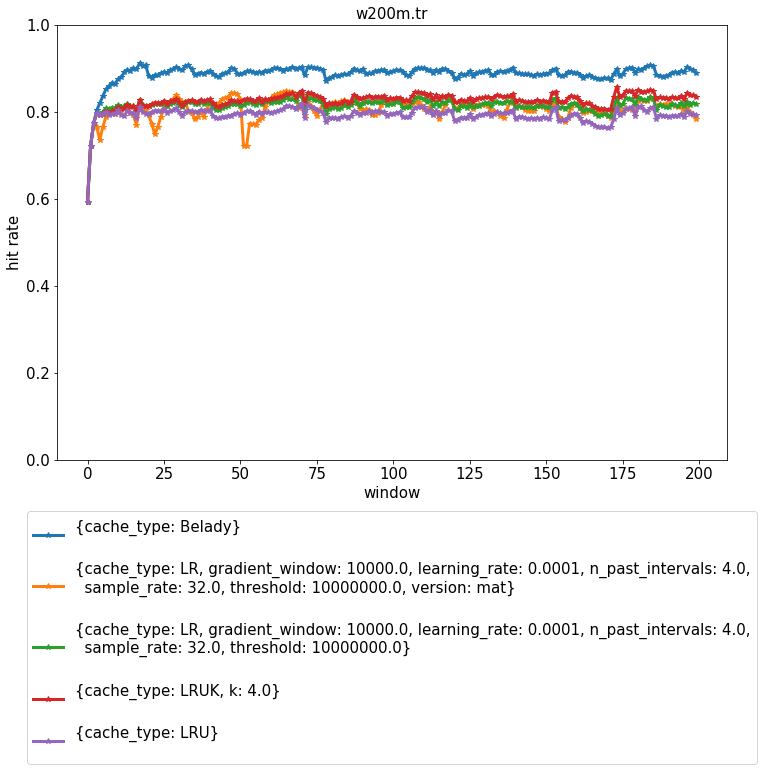

In [149]:
fig, ax = plt.subplots(figsize=(12, 8))
for k, grp in df1.groupby(['label']):
    value = yaml.load(grp.segment_byte_hit_rate.values[0])
    plt.plot(value, label=k, marker='*')
#     ax = grp.plot(ax=ax, kind='line', x='cache_size', y='byte_hit_rate', label=k, marker='*', markersize=12)
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1))
plt.xlabel('window')
plt.ylabel('hit rate')
plt.title(trace)
plt.ylim([0, 1.])
plt.show()

In [146]:
trace = 'w200m.tr'

df = load_reports(log_dir)
filter_idx = (
    (df.trace_file == trace) 
    & (df.uni_size == 0)
    & ((df.cache_type != "LFO") | (df.sample_size == 1000000))
    & (df.n_warmup == 20000000)
#     & ((df.cache_type != "LR") | ((df.learning_rate == 0.0001) & (df.gradient_window == 10000) & (df.sample_rate == 32) & (pd.isna(df.version))))
    & ((df.cache_type != "LR") | ((df.version == "mat") & (df.gradient_window == 100000)))
    & (~(df.cache_type == "LRUKSample"))
#     & (df.n_warmup == 100000)
#     & (df.if_uni_size == False)
#     & (df.cache_capacity <= 30000)
#     & (
#         (df.algorithm.isin(['SLRU', 'Belady', 'Random', 'LRU', 'BeladyLR'])) 
#         | (df.algorithm.isin(['FIFOLR', 'LRULR', 'GDSFLR', 'LFULR']))
#         | ((df.algorithm == 'LR') & (df.sample_rate == 32))
#         | ((df.algorithm == 'SLRULR') & (df.sample_rate == 32))
#     )
)

df1 = df[filter_idx].copy()
df1['label'] = df1.apply(lambda x: to_label(x), axis='columns')

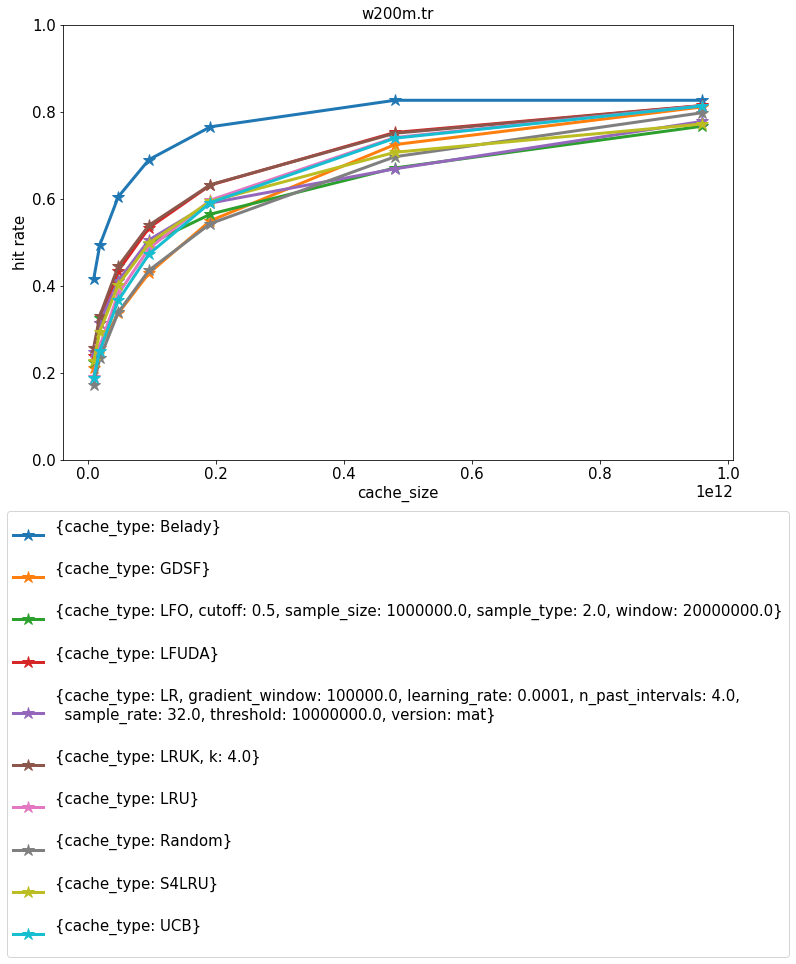

In [147]:
top = df1[['label', 'cache_size', 'byte_hit_rate']].groupby(['label']).agg({'byte_hit_rate': 'mean'}).sort_values(by='byte_hit_rate', ascending=False)[0:5].index.tolist()
df_show = df1[df1.label.isin(top)]
df_show = df1

fig, ax = plt.subplots(figsize=(12, 8))
for k, grp in df_show.groupby(['label']):
    grp = grp.sort_values(by=['cache_size'])
    ax = grp.plot(ax=ax, kind='line', x='cache_size', y='byte_hit_rate', label=k, marker='*', markersize=12)
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1))
plt.ylabel('hit rate')
plt.title(trace)
plt.ylim([0, 1.])
plt.show()

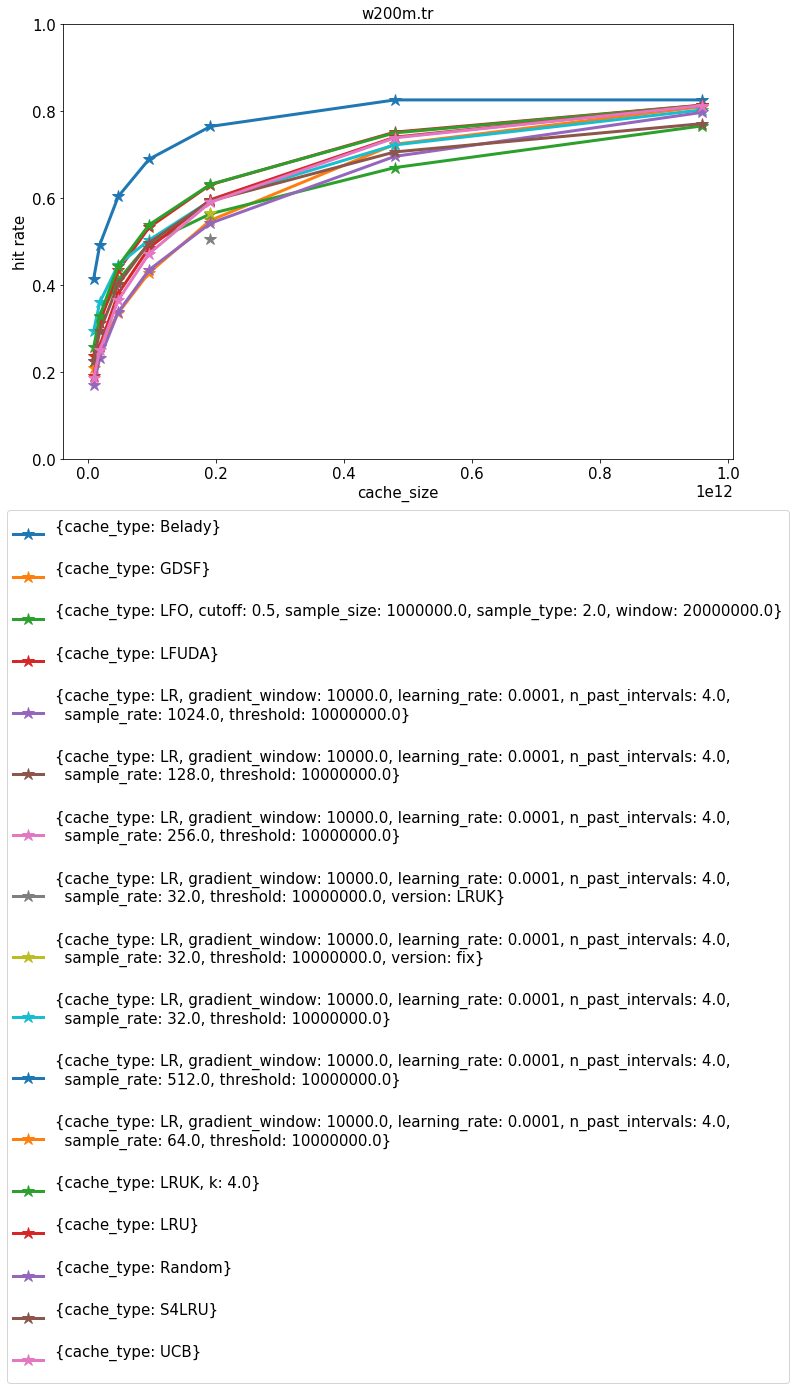

In [96]:
top = df1[['label', 'cache_size', 'byte_hit_rate']].groupby(['label']).agg({'byte_hit_rate': 'mean'}).sort_values(by='byte_hit_rate', ascending=False)[0:5].index.tolist()
df_show = df1[df1.label.isin(top)]
df_show = df1

fig, ax = plt.subplots(figsize=(12, 8))
for k, grp in df_show.groupby(['label']):
    grp = grp.sort_values(by=['cache_size'])
    ax = grp.plot(ax=ax, kind='line', x='cache_size', y='byte_hit_rate', label=k, marker='*', markersize=12)
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1))
plt.ylabel('hit rate')
plt.title(trace)
plt.ylim([0, 1.])
plt.show()

In [130]:
df1.pivot(index='cache_type', columns='cache_size', values='byte_hit_rate')

cache_size,9600000000,19200000000,48000000000,96000000000,192000000000,480000000000,960000000000
cache_type,,,,,,,
Belady,0.414768,0.493362,0.604367,0.689930,0.765384,0.826356,0.826356
GDSF,0.209949,0.257285,0.336574,0.428880,0.549486,0.724464,0.811063
LFO,0.225032,0.326637,0.411997,0.496126,0.564566,0.670732,0.766721
LFUDA,0.237470,0.313961,0.434256,0.533034,0.631532,0.752381,0.814397
LR,0.288424,0.349586,0.369833,0.496428,0.592434,0.717688,0.805840
LRU,0.190943,0.261215,0.381147,0.485759,0.596894,0.740758,0.813637
LRUK,0.257455,0.330342,0.444639,0.539043,0.632331,0.750577,0.813929
Random,0.171539,0.232671,0.338630,0.435378,0.542856,0.696569,0.797825
S4LRU,0.226486,0.294355,0.401959,0.497943,0.594091,0.706768,0.771857


In [85]:
df1.pivot(index='cache_type', columns='cache_size', values='byte_hit_rate')

cache_size,9600000000,19200000000,48000000000,96000000000,192000000000,480000000000,960000000000
cache_type,,,,,,,
Belady,0.414768,0.493362,0.604367,0.689930,0.765384,0.826356,0.826356
GDSF,0.209949,0.257285,0.336574,0.428880,0.549486,0.724464,0.811063
LFO,0.225032,0.326637,0.411997,0.496126,0.564566,0.670732,0.766721
LFUDA,0.237470,0.313961,0.434256,0.533034,0.631532,0.752381,0.814397
LR,0.294860,0.360900,0.447745,0.503979,0.594769,0.722924,0.803462
LRU,0.190943,0.261215,0.381147,0.485759,0.596894,0.740758,0.813637
LRUK,0.257455,0.330342,0.444639,0.539043,0.632331,0.750577,0.813929
Random,0.171539,0.232671,0.338630,0.435378,0.542856,0.696569,0.797825
S4LRU,0.226486,0.294355,0.401959,0.497943,0.594091,0.706768,0.771857


In [117]:
trace = 'w200m.tr'

df = load_reports(log_dir)
filter_idx = (
    (df.trace_file == trace) 
    & (df.uni_size == 0)
    & (df.n_warmup == 20000000)
    & (df.cache_size == 192000000000)
    & (~ pd.isna(df.segment_byte_hit_rate))
#     & (~ ((df.cache_type == "LR") & ((pd.isna(df.version)) | (df.version == "fix") ) ))
    & (~ ((df.cache_type == "LR")))
    
)

df1 = df[filter_idx].copy()
df1['label'] = df1.apply(lambda x: to_label(x), axis='columns')

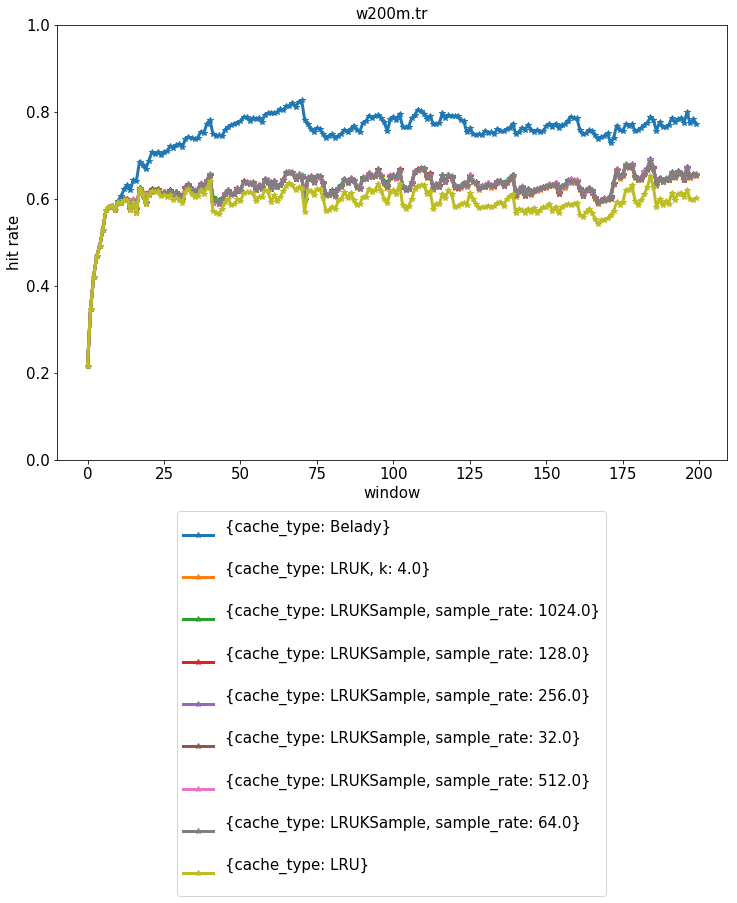

In [118]:
fig, ax = plt.subplots(figsize=(12, 8))
for k, grp in df1.groupby(['label']):
    value = yaml.load(grp.segment_byte_hit_rate.values[0])
    plt.plot(value, label=k, marker='*')
#     ax = grp.plot(ax=ax, kind='line', x='cache_size', y='byte_hit_rate', label=k, marker='*', markersize=12)
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1))
plt.xlabel('window')
plt.ylabel('hit rate')
plt.title(trace)
plt.ylim([0, 1.])
plt.show()